<span style="font-size: 14pt">MIPT, Information Retrieval, Autumn 2018</span>

<span style="font-size: 16pt"> Seminar #4: Ranking</span>

<img width=300 src="priestor34.jpg">

На основе: https://github.com/fabianp/minirank/blob/master/notebooks/pairwise_transform.ipynb

https://habrahabr.ru/post/263823/

и семинаров Никиты Волкова

<span style="color:blue; font-size: 12pt">Анастасия Зухба</span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">a__l@mail.ru</span>

<span style="color:blue; font-size: 12pt">Алексей Романенко</span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>


<h3> План </h3>
     
  * ** Постановка задачи ранжирования ** (10 минут)
  * ** Функционалы качества ранжирования ** (10 минут)
  * ** Построение признаков для задачи ранжирования ** (20 минут)
  * ** Попарная трансформация ** (20 минут)
  * ** RankLib (The Lemur Project)** (20 минут)
  * ** "Игрушечный" поисковый движок ** (для самостоятельного изучения)</span> 
  

# Постановка задачи ранжирования

$X$ --- множество объектов

$X^\ell=\{x_1,\dots,x_\ell\}$ --- обучающая выборка

$i\prec j$ --- правильный порядок на парах $(i,j) \in \{1,\dots,\ell\}^2$


**Задача:**

построить ранжирующую функцию $a\colon X\to\mathbb{R}$ такую, что:     $
i\prec j \;\;\Rightarrow\;\; a(x_i) < a(x_j)$


# Функционалы качества ранжирвания

 **Доля инверсий** порядка среди первых $n$ документов:
$$
 DP_n(q) = \frac2{n(n-1)}\sum_{i<j}^n\Bigl[y(q,d_q^{(i)}) < y(q,d_q^{(j)})\Bigr].
$$

**Коэффициент корреляции Кенделла** (http://en.wikipedia.org/wiki/Kendall_tau_rank_correlation_coefficient)

$$\tau=\frac{P - Q}{P + Q},$$

где:

$P$ --- количество пар, для которых взаимный порядок совпадает (для двух заданных ранжирований),

$Q$ --- количество пар, для которых он не совпадает.

    Доля инверсий связана с коэффициентом ранговой корреляции Кенделла следующим образом:
$$
        \tau(a,y) = 1-2 \cdot DP_n(q).
$$

   Обозначим:
   
$y(q,d)$ -- релевантность,

$a(q,d)$ -- искомая функция ранжирования,

$d_q^{(i)}$ -- $i$-й документ по убыванию $a(q,d)$.

**Дисконтированная (взвешенная) сумма выигрышей}:**

$$
        DCG_n(q) = \sum_{i=1}^n
            \underbrace{G_q(d_q^{(i)})}_{\text{gain}}
            \;\cdot
            \underbrace{D(i)}_{\text{discount}}
$$

где:

$G_q(d) = (2^{y(q,d)}-1)$ -- больший вес релевантным документам
    
$D(i) = 1/\log_2(i+1)$ -- больший вес вначале выдачи

**Нормированная дисконтированная сумма выигрышей}:**

$$
        NDCG_n(q) = \frac{DCG_n(q)}{\max DCG_n(q)}
$$

$\max DCG_n(q)$ -- это $DCG_n(q)$ при идеальном ранжировании

# Построение признаков

### TF-IDF - классический текстовый признак


TF-IDF$(q,d)$ - мера релевантности документа $d$ запросу $q$

$n_{dw}$ (term frequency) - число вхождений слова $w$ в текст $d$;

$N_{w}$ (document frequency) - число документов, содержащих~$w$;

$N$ - число документов в коллекции $D$;


$N_{w}/N$ - оценка вероятности встретить слово $w$ в документе;

$(N_{w}/N)^{n_{dw}}$ - оценка вероятности встретить его $n_{dw}$ раз;

$P(q,d) = \prod\limits_{w\in q} (N_{w}/N)^{n_{dw}}$ -
оценка вероятности встретить в~документе $d$ слова запроса $q=\{w_1,\dots,w_k\}$ **чисто случайно**;

Оценка релевантности запроса $q$ документу $d$:

$$ -\log P(q,d) = \sum_{w\in q}
        \underbrace{n_{dw}\mathstrut}_{\text{TF}(w,d)}
        \underbrace{\log (N/N_{w})}_{\text{IDF}(w)}
        \;\; \to \;\; \max. $$

TF$(w,d) = n_{dw}$ - term frequency;

IDF$(w)=\log (N/N_{w})$ - inverted document frequency.

### PageRank - классический ссылочный признак

Документ $d$ тем важнее,
- чем больше других документов $c$ ссылаются на $d$,
- чем важнее документы $c$, ссылающиеся на $d$,
- чем меньше других ссылок имеют эти документы $c$.

    
Вероятность попасть на страницу $d$, если кликать случайно:
    
$$PR(d) = \frac{1-\delta}N + \delta\! \sum_{c\in D^{in}_d} \frac{PR(c)}{|D^{out}_c|},$$
    
    
$D^{in}_d \subset D$ - множество документов, ссылающихся на $d$,

$D^{out}_c \subset D$ - множество документов, на которые ссылается $c$,

$\delta = 0.85$ - вероятность продолжать клики (damping factor),

$N$ - число документов в коллекции $D$.

Sergey Brin, Lawrence Page.
The Anatomy of a Large-Scale Hypertextual Web Search Engine. 1998.

** Упражнение:** Посчитать PageRank для небольшого графа.

Demonstrates the use of a short Python implementation of the PageRank algorithm on the link structure contained in the graph on the [PageRank Wikipedia](http://en.wikipedia.org/wiki/PageRank) page:

In [1]:
from IPython.display import Image
Image(url='http://upload.wikimedia.org/wikipedia/commons/f/fb/PageRanks-Example.svg')

In [2]:
import numpy as np

Запишем связи между вершинами графа в виде матрицы `M_counts`.

In [3]:
n_pages = 11 # numbering pages A through K as 0 to 10
M_counts = np.zeros((n_pages, n_pages)) # will hold the number of link counts (assumed 0 or 1)
# columns = starting page, row = destination page, ie M_ij = whether or not there is a link from j to i

M_counts[:,0] = 1 # page 0 (A in the graphic) is a sink because it has no outgoing links at all; 
# however, M cannot contain an all-zero column, so do as if A was linking to all other pages (ie put 1's everywhere)
M_counts[2,1] = 1 # B->C
M_counts[1,2] = 1 # C->B
M_counts[0,3] = 1 # D->A
M_counts[1,3] = 1 # D->B
M_counts[1,4] = 1 # E->B
M_counts[3,4] = 1 # E->D
M_counts[5,4] = 1 # E->F
M_counts[1,5] = 1 # F->B
M_counts[4,5] = 1 # F->E
M_counts[1,6] = 1 # G,H,I->B,E
M_counts[4,6] = 1
M_counts[1,7] = 1
M_counts[4,7] = 1
M_counts[1,8] = 1
M_counts[4,8] = 1
M_counts[4,9] = 1 # J,K->E
M_counts[4,10] = 1
print(M_counts)

[[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Отнормируем столбцы матрицы `M_counts`

In [6]:
M = np.empty((n_pages, n_pages))
for j in range(n_pages):
    M[:,j] = M_counts[:,j] / M_counts[:,j].sum()
np.set_printoptions(precision=3)
print(M)

[[ 0.091  0.     0.     0.5    0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.091  0.     1.     0.5    0.333  0.5    0.5    0.5    0.5    0.     0.   ]
 [ 0.091  1.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.091  0.     0.     0.     0.333  0.     0.     0.     0.     0.     0.   ]
 [ 0.091  0.     0.     0.     0.     0.5    0.5    0.5    0.5    1.     1.   ]
 [ 0.091  0.     0.     0.     0.333  0.     0.     0.     0.     0.     0.   ]
 [ 0.091  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.091  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.091  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.091  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.091  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]]


Проверим, что матрица M удовлетворяет всем условиям:

In [5]:
import numpy
def check_M(M):
    """
    check that M has the right format to be used by pagerank function
    """
    n_pages = M.shape[0] # n_pages is the number of rows of M
    np.testing.assert_equal(M.shape[0], M.shape[1], err_msg = 'M should be square')
    np.testing.assert_array_almost_equal(M.sum(axis=0), np.ones((n_pages)), 
                                         err_msg = 'assert each column sums to one (M is assumed column-stochastic)')
    for j in range(n_pages):
        M_column = M[:,j]
        n_nonzero = np.count_nonzero(M[:,j])
        np.testing.assert_array_almost_equal(M_column[M_column.nonzero()], np.ones((n_nonzero)) / n_nonzero,
                                             err_msg = 'in column %g, all non-zero entries should be equal (and equal to 1 divided by their number)' % j)

check_M(M) # will produce error if M does not have the right format

Посчитаем `pagerank` итерационо:

In [6]:
import numpy as np
def pagerank(M, d=0.85, square_error=1e-6):
    """
    M : the adjacency matrix of the pages. It is assumed to be column-stochastic (ie column sum to 1); all links have equal weight.
    A page with no outgoing links (sink) is represented as a page with outgoing links to each other page (ie restart page).
    d: damping factor
    square_error : the algorithm iterates until the difference between two successive PageRank vectors v is less than this (in squared norm)
    returns the PageRanks of all pages
    """
    n_pages = M.shape[0] # n_pages is the number of rows of M
    v = np.random.rand(n_pages) # initialize to random vector
    v = v / v.sum() # make v sum to 1
    last_v = np.ones((n_pages)) # will contain the previous v
    M_hat = d * M + (1-d)/n_pages * np.ones((n_pages, n_pages)) # equation (***) in Wikipedia page
    while np.square(v - last_v).sum() > square_error:
        last_v = v
        v = M_hat.dot(v) # at each iteration, progress one timestep
    return v
    

In [7]:
pagerank(M)

array([0.033, 0.385, 0.343, 0.039, 0.081, 0.039, 0.016, 0.016, 0.016,
       0.016, 0.016])

Данные числа примерно равны тем, что изображены на графе 

# Попарная трансформация

Сгенерируем датасет:

In [98]:
import itertools
import numpy as np
from scipy import stats, linalg
from sklearn import svm, linear_model, cross_validation

import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('text', usetex=True)
plt.rc('text.latex', unicode=True)
plt.rc('text.latex', preamble='\\usepackage[utf8]{inputenc}')
plt.rc('text.latex', preamble='\\usepackage[russian]{babel}')
plt.rc('font', family='serif', size='16')

Сгенерируем датасет из 60 объектов с двумя признаками, для которого оценка релевантности принимает три различных значения --- 0, 1 и 2.
Датасет имеет два различных запроса, по каждому из которых есть 30 потенциально релеватных документа.
На графике точки, соответствующие парам запрос-документ для первого запроса изображены круглыми точкам, для второго --- треугольными.

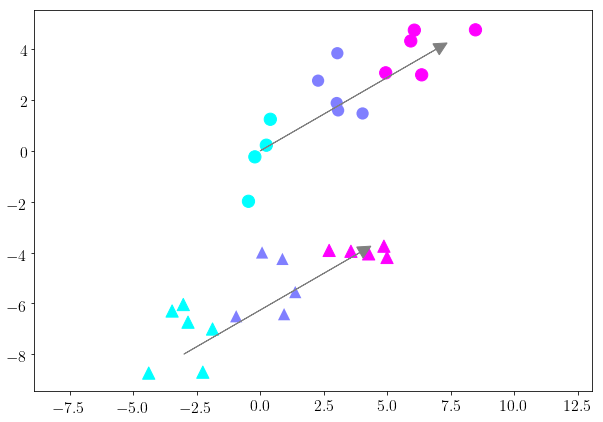

In [104]:
np.random.seed(21)
theta = np.deg2rad(60)
w = np.array([np.sin(theta), np.cos(theta)])
K = 20
X = np.random.randn(K, 2)
y = [0] * K
for i in range(1, 3):
    X = np.concatenate((X, np.random.randn(K, 2) + i * 4 * w))
    y = np.concatenate((y, [i] * K))

# slightly displace data corresponding to our second partition
X[::2] -= np.array([3, 7]) 
blocks = np.array([0, 1] * int(X.shape[0] / 2))

# split into train and test set
cv = cross_validation.StratifiedShuffleSplit(y, test_size=.5, n_iter=1)
train, test = next(iter(cv))
X_train, y_train, b_train = X[train], y[train], blocks[train]
X_test, y_test, b_test = X[test], y[test], blocks[test]

# plot the result
idx = (b_train == 0)
plt.figure(figsize=(10, 7))
plt.scatter(X_train[idx, 0], X_train[idx, 1], c=y_train[idx], marker='^', 
            cmap=plt.cm.cool, s=150, lw=(1 - y_train[idx]))
plt.scatter(X_train[~idx, 0], X_train[~idx, 1], c=y_train[~idx], marker='o', 
            cmap=plt.cm.cool, s=150, lw=(1 - y_train[~idx]))
plt.arrow(0, 0, 8 * w[0], 8 * w[1], fc='gray', ec='gray', 
          head_width=0.5, head_length=0.5)
plt.arrow(-3, -8, 8 * w[0], 8 * w[1], fc='gray', ec='gray', 
          head_width=0.5, head_length=0.5)
plt.axis('equal')
plt.show()

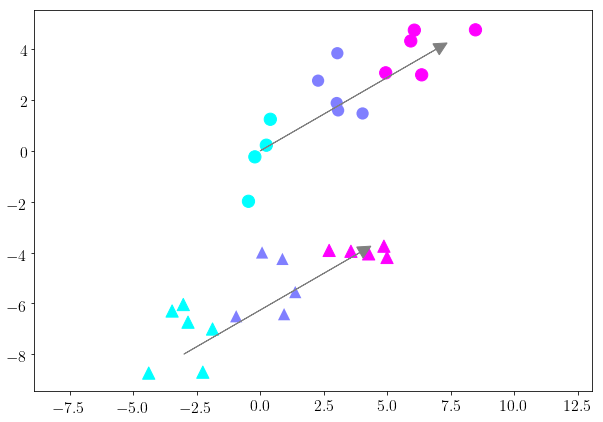

In [105]:
np.random.seed(21)
theta = np.deg2rad(60)
w = np.array([np.sin(theta), np.cos(theta)])
K = 20
X = np.random.randn(K, 2)
y = [0] * K
for i in range(1, 3):
    X = np.concatenate((X, np.random.randn(K, 2) + i * 4 * w))
    y = np.concatenate((y, [i] * K))

# slightly displace data corresponding to our second partition
X[::2] -= np.array([3, 7]) 
blocks = np.array([0, 1] * int(X.shape[0] / 2))

# split into train and test set
cv = cross_validation.StratifiedShuffleSplit(y, test_size=.5, n_iter=1)
train, test = next(iter(cv))
X_train, y_train, b_train = X[train], y[train], blocks[train]
X_test, y_test, b_test = X[test], y[test], blocks[test]

# plot the result
idx = (b_train == 0)
plt.figure(figsize=(10, 7))
plt.scatter(X_train[idx, 0], X_train[idx, 1], c=y_train[idx], marker='^', 
            cmap=plt.cm.cool, s=150, lw=(1 - y_train[idx]))
plt.scatter(X_train[~idx, 0], X_train[~idx, 1], c=y_train[~idx], marker='o', 
            cmap=plt.cm.cool, s=150, lw=(1 - y_train[~idx]))
plt.arrow(0, 0, 8 * w[0], 8 * w[1], fc='gray', ec='gray', 
          head_width=0.5, head_length=0.5)
plt.arrow(-3, -8, 8 * w[0], 8 * w[1], fc='gray', ec='gray', 
          head_width=0.5, head_length=0.5)
plt.axis('equal')
plt.show()

На графике четко видно, что для обоих запросов есть общий вектор $w$, такой что проекция на него дает правильное ранжирование.
Однако, линейные модели считают, что все объекты лежат в некотором метрическом пространстве.
Таким образом, при рассмотрении таких моделей мы будем получать результат явно не оптимальный.

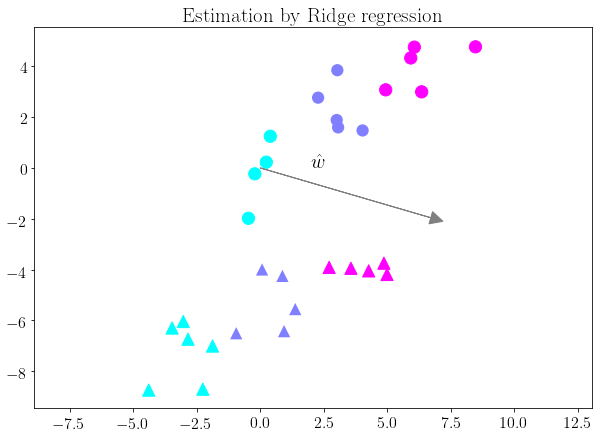

In [106]:
ridge = linear_model.Ridge(1.)
ridge.fit(X_train, y_train)
coef = ridge.coef_ / linalg.norm(ridge.coef_)

plt.figure(figsize=(10, 7))
plt.scatter(X_train[idx, 0], X_train[idx, 1], c=y_train[idx], marker='^', 
            cmap=plt.cm.cool, s=150, lw=(1 - y_train[idx]))
plt.scatter(X_train[~idx, 0], X_train[~idx, 1], c=y_train[~idx], marker='o', 
            cmap=plt.cm.cool, s=150, lw=(1 - y_train[~idx]))
plt.arrow(0, 0, 7 * coef[0], 7 * coef[1], fc='gray', ec='gray', 
          head_width=0.5, head_length=0.5)
plt.text(2, 0, '$\hat{w}$', fontsize=20)
plt.axis('equal')
plt.title('Estimation by Ridge regression')
plt.show()

Посчитаем коэффициент корреляции Кенделла на тесте для каждого запроса отдельно.

In [107]:
for i in range(2):
    tau, _ = stats.kendalltau(ridge.predict(X_test[b_test == i]), y_test[b_test == i])
    print('Kendall correlation coefficient for query %s: %.3f' % (i, tau))

Kendall correlation coefficient for query 0: 0.845
Kendall correlation coefficient for query 1: 0.822


Как показано в (http://www.mendeley.com/research/support-vector-learning-ordinal-regression/), если мы будем рассматривать линейные функции для ранжирования, вместо задачи ранжирования можно рассматривать эквивалентную задачу двуклассовой классификации.
Для этого мы создадим разности всех сравнимых элементов, то есть наши данные будут преобразованы в $(X'_k, Y'_k) = (X_i - X_j, sign(Y_i - Y_j))$ для пар, для которых можно определить порядок.

Следующий график показывает этот преобразованный датасет, цвет точек отражает разницу в метках, и наша задача --- отделить положительные точки от отрицательных. Гиперплоскость $x^T w = 0$ разделяет эти классы.

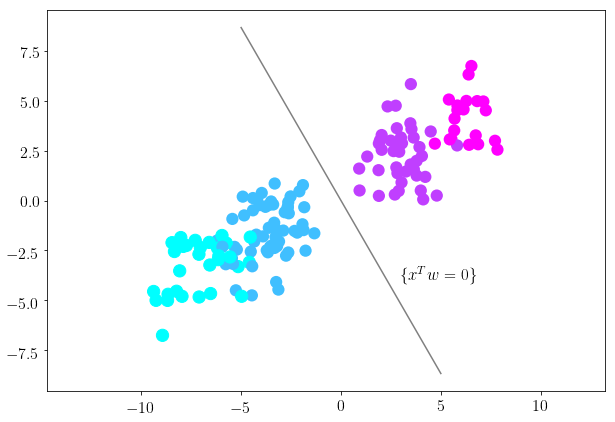

In [110]:
# form all pairwise combinations
comb = itertools.combinations(range(X_train.shape[0]), 2)
k = 0
Xp, yp, diff = [], [], []

for (i, j) in comb:
    if y_train[i] == y_train[j] \
        or blocks[train][i] != blocks[train][j]:
        # skip if same target or different group
        continue
        
    Xp.append(X_train[i] - X_train[j])
    diff.append(y_train[i] - y_train[j])
    yp.append(np.sign(diff[-1]))
    k += 1
    
Xp, yp, diff = map(np.asanyarray, (Xp, yp, diff))

plt.figure(figsize=(10, 7))
plt.scatter(Xp[:, 0], Xp[:, 1], c=diff, s=150, lw=(diff == -2), 
            marker='o', cmap=plt.cm.cool)
x_space = np.linspace(-10, 10)
plt.plot(x_space * w[1], - x_space * w[0], color='gray')
plt.text(3, -4, '$\{x^T w = 0\}$', fontsize=17)
plt.axis('equal')
plt.show()

Как мы видим на предыдущем графике, классы разделимы.
Это не всегда будет так, но на нашей обучающей выборке нет инверсий порядка.

Теперь мы можем обучить SVM на преобразованных данных.
Эта модель называется RankSVM.
Далее приведен график обучающей выборки вместе с оцененным коэффициентом $\hat{w}$ с помощью RankSVM.

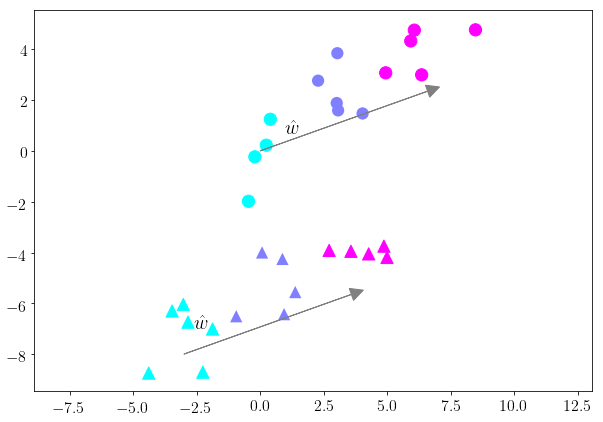

In [111]:
clf = svm.SVC(kernel='linear', C=.1)
clf.fit(Xp, yp)
coef = clf.coef_.ravel() / linalg.norm(clf.coef_)

plt.figure(figsize=(10, 7))
plt.scatter(X_train[idx, 0], X_train[idx, 1], c=y_train[idx], 
            lw=(1 - y_train[idx]), marker='^', cmap=plt.cm.cool, s=150)
plt.scatter(X_train[~idx, 0], X_train[~idx, 1], c=y_train[~idx], 
            lw=(1 - y_train[~idx]), marker='o', cmap=plt.cm.cool, s=150)
plt.arrow(0, 0, 7 * coef[0], 7 * coef[1], fc='gray', ec='gray', 
          head_width=0.5, head_length=0.5)
plt.arrow(-3, -8, 7 * coef[0], 7 * coef[1], fc='gray', ec='gray', 
          head_width=0.5, head_length=0.5)
plt.text(1, .7, '$\hat{w}$', fontsize=20)
plt.text(-2.6, -7, '$\hat{w}$', fontsize=20)
plt.axis('equal')
plt.show()

Наконец, убедимся, что коэффициент корреляции Кенделла увеличивается при использовании RankSVM вместо линейной регрессии.

In [112]:
for i in range(2):
    tau, _ = stats.kendalltau(
        np.dot(X_test[b_test == i], coef), y_test[b_test == i])
    print('Kendall correlation coefficient for query %s: %.3f' % (i, tau))

Kendall correlation coefficient for query 0: 0.845
Kendall correlation coefficient for query 1: 0.842


Эти значения действительно больше, чем значения (0.845, 0.822), полученные в случае линейной регрессии.

# RankLib (The Lemur Project)

<img src="lemur-big-370.png">

RankLib --- мощная библиотека для обучения ранжированию. Написана на Java. Описание https://sourceforge.net/p/lemur/wiki/RankLib/

Возьмем датасет с конкурса «Интернет-математика 2009»
https://academy.yandex.ru/events/data_analysis/grant2009/

Ниже определены некоторые вспомогательные функции.

In [113]:
def read_file(file_path, features_count):
    ''' Считывает дата-файл по адресу file_path, в котором есть не более features_count признаков.
    Возвращает список меток релевантности, id запросов и матрицу признаков'''
    
    relevs = []
    qids = []
    features = []
    
    with open(file_path) as data_file:
        for line in data_file:
            split_line = line.split(' ')
            
            # релевантность и id запроса
            relevs.append(split_line[0])
            qids.append(int(split_line[1].split(':')[1]))
            
            # признаки
            object_features = np.zeros(features_count, dtype=float)
            for feat in split_line[2:]:
                index, value = map(float, feat.split(':'))
                object_features[index] = value
            
            features.append(object_features)
    
    return relevs, qids, np.array(features)


def write(features, relevs, qids, file_path, index_begin, index_end):
    ''' Создает файл по адресу file_path, в который будут записаны релевантности relevs,
    номера запросов qids и признаки features с номера index_begin по index_end. '''
    
    with open(file_path, 'w') as f:
        for index_line in range(index_begin, index_end):
            f.write('{} qid:{}'.format(relevs[index_line], qids[index_line]))
            for i in range(features.shape[1]):
                f.write(' {}:{}'.format(i + 1, features[index_line, i]))
            f.write('\n')
            

def split_to_train_valid_test(relevs, qids, features, 
                              train_path, test_path,
                              train_size, test_size,
                              valid_path=None, valid_size=None):
    ''' Разбивает датасет на две или три части, и записывает их в файлы'''

    num_docs = len(qids)
    i_0 = 0
    
    qids = np.array(qids)
    is_new_query = qids[:-1] != qids[1:]  # True в тех позициях, в которых начинается новый запрос
    new_query_positions = np.arange(num_docs - 1)[is_new_query]  # Позиции, в которых начинается новый запрос

    # Ищем позицию, на которой заканчивается train
    allow_positions = new_query_positions > (train_size * num_docs)
    i_1 = new_query_positions[allow_positions][0] if np.sum(allow_positions) > 0 else num_docs

    # Ищем позицию, на которой заканчивается test
    allow_positions = new_query_positions > ((train_size + test_size) * num_docs)
    i_2 = new_query_positions[allow_positions][0] if np.sum(allow_positions) > 0 else num_docs

    write(features, relevs, qids, train_path, i_0, i_1)
    write(features, relevs, qids, test_path, i_1, i_2)

    if valid_path is not None:
        # Ищем позицию, на которой заканчивается valid
        allow_positions = new_query_positions > ((train_size + test_size + valid_size) * num_docs)
        i_3 = new_query_positions[allow_positions][0] if np.sum(allow_positions) > 0 else num_docs

        write(features, relevs, qids, valid_path, i_2, i_3)

Исходный датасет разбивается на train, valid и test. Результат этого разбиения лежит в папке data.

Разобьем его на три части и запишем каждую в файл. Основная проблема --- для RankLib у объекта должны быть указаны все признаки, даже если они равны нулю. Поэтому приходится их искусственно дописывать.

Запустим LambdaMART (бустинг на деревьях, модель 6) на 100 деревьях с 5 листами в каждом. Будем использовать метрику $NDCG_{10}$. Сохраняем саму модель в ./model/LambdaMART_100_5.txt, а вывод обучения в ./model/log_LambdaMART_100_5.txt

In [114]:
%%time
! java -jar RankLib-2.1-patched.jar -train ./data/train.txt -test ./data/test.txt -validate ./data/valid.txt -ranker 6 -tree 100 -leaf 5 -metric2t NDCG@10 -save ./model/LambdaMART_100_5.txt > ./model/log_LambdaMART_100_5.txt

No Java runtime present, requesting install.
CPU times: user 4.82 ms, sys: 10.6 ms, total: 15.4 ms
Wall time: 155 ms


1000 деревьев, 10 листев в каждом

In [12]:
%%time
! java -jar RankLib-2.1-patched.jar -train ./data/train.txt -test ./data/test.txt -validate ./data/valid.txt -ranker 6 -metric2t NDCG@10 -save ./model/LambdaMART_1000_10.txt > ./model/log_LambdaMART_1000_10.txt

CPU times: user 225 ms, sys: 28.2 ms, total: 253 ms
Wall time: 27.8 s


Тоже самое, но без валидационной выборки. То есть он будет строить все 1000 деревьев

In [13]:
%%time
! java -jar RankLib-2.1-patched.jar -train ./data/train.txt -test ./data/test.txt -ranker 6 -metric2t NDCG@10 -save ./model/LambdaMART_1000_10_novalid.txt > ./model/log_LambdaMART_1000_10_novalid.txt

CPU times: user 755 ms, sys: 100 ms, total: 855 ms
Wall time: 1min 40s


Запустим RankNet (нейронная сеть) с различными параметрами

In [14]:
%%time
! java -jar RankLib-2.1-patched.jar -train ./data/train.txt -test ./data/test.txt -validate ./data/valid.txt -ranker 1 -metric2t NDCG@10 -save ./model/RankNet.txt > ./model/log_RankNet.txt

CPU times: user 314 ms, sys: 16.6 ms, total: 330 ms
Wall time: 44.8 s


In [15]:
%%time
! java -jar RankLib-2.1-patched.jar -train ./data/train.txt -test ./data/test.txt -validate ./data/valid.txt -ranker 1 -layer 3 -node 30 -metric2t NDCG@10 -save ./model/RankNet_3_30.txt > ./model/log_RankNet_3_30.txt

CPU times: user 1.13 s, sys: 93 ms, total: 1.22 s
Wall time: 2min 46s


# "Игрушечный" поисковый движок

Есть два основный этапа в разработке поискового движка: построение индекса, а затем, используя индекс, ответить на запрос. А затем мы можем добавить результат рейтинга (TF-IDF, PageRank и т.д.), классификацию запрос/документ, и, возможно, немного машинного обучения, чтобы отслеживать последние запросы пользователя и на основе этого выбрать результаты для повышения производительности поисковой системы.

## Построение индекса

Таким образом, первый шаг в построении текстового поискового движка — это сборка перевёрнутого индекса. 
**Перевёрнутый индекс** — это структура данных, которая сопоставляет маркеры с документами, в который они появляются. В данном контексте мы можем рассматривать маркер просто как слова, таким образом перевёрнутый индекс, в своей основе, это что-то, что берёт слово и возвращает нам список документов, где оно встречается.

Необходимо проанализировать и отметить (маркировать, разделив на слова) множество документов. Мы сделаем это следующим образом: для каждого документа, который мы хотим добавить в наш индекс, мы удалим всю пунктуацию и разделить его на пробелы, создадим временную хеш-таблицу, которая соотносит имена документов к списку маркеров.  Вот код, который сделает первоначальную фильтрацию текста:

In [17]:
def process_files(self):
    file_to_terms = {}
    for file in self.filenames:
        pattern = re.compile('[\W_]+')
        file_to_terms[file] = open(file, 'r').read().lower();
        file_to_terms[file] = pattern.sub(' ',file_to_terms[file])
        re.sub(r'[\W_]+','', file_to_terms[file])
        file_to_terms[file] = file_to_terms[file].split()
    return file_to_terms

Перевёрнутый индекс будет картой слова до имени документа, но мы так же хотим поддерживать запросы с фразами: запросы не только для слов, но и для слов в определённой последовательности. Для этого мы должны знать где в документе появляется каждое слово, таким образом мы сможем проверить порядок слов. Я индекс каждого слова в маркированном списке на документ в качестве позиции слова в этом документе, поэтому наш конечный перевернутый индекс будет выглядеть следующим образом:

**{word: {documentID: [pos1, pos2, ...]}, ...}, ...}**

вместо такого:

**{word: [documentID, ...], ...}**


Таким образом, наша первая задача состоит в том, чтобы создать сопоставление слов для своих позиций для каждого документа, а затем объединить их, чтобы создать наш полный перевёрнутый индекс. Это выглядит как:

In [18]:
#input = [word1, word2, ...]
#output = {word1: [pos1, pos2], word2: [pos2, pos434], ...}
def index_one_file(termlist):
    fileIndex = {}
    for index, word in enumerate(termlist):
        if word in fileIndex.keys():
            fileIndex[word].append(index)
        else:
            fileIndex[word] = [index]
    return fileIndex

Код принимает список терминов в документе, разделённые пробелом (в котором слова находятся в их первоначальном порядке), и добавляет каждое в хеш-таблицу, где значением является список позиций этого слова в документе. Мы строим этот список многократно, как мы идём по списку, до тех пор, пока не пройдём все слова, оставив нас с таблицей, снабжённую ключами по строкам и размеченными до списка позиций этих строк.

Теперь нам нужно объединить эти хеш-таблицы. 

Промежуточный формат индекса:

**{documentID: {word: [pos1, pos2, ...]}, ...}**

который преобразуется к окончательному формату:

In [19]:
#input = {filename: [word1, word2, ...], ...}
#res = {filename: {word: [pos1, pos2, ...]}, ...}
def make_indices(termlists):
    total = {}
    for filename in termlists.keys():
        total[filename] = index_one_file(termlists[filename])
    return total

данный код принимает результаты функции file_to_terms, и создает новую хеш-таблицу помеченных ключом по имени файла и со значениями, которые являются результатом предыдущей функции, создавая вложенную хеш-таблицу.

Строим перевернутый индекс:

In [20]:
#input = {filename: {word: [pos1, pos2, ...], ... }}
#res = {word: {filename: [pos1, pos2]}, ...}, ...}
def fullIndex(regdex):
    total_index = {}
    for filename in regdex.keys():
        for word in regdex[filename].keys():
            if word in total_index.keys():
                if filename in total_index[word].keys():
                    total_index[word][filename].extend(regdex[filename][word][:])
                else:
                    total_index[word][filename] = regdex[filename][word]
            else:
                total_index[word] = {filename: regdex[filename][word]}
    return total_index

Теперь мы можем ввести слово, и должны получить перечень документов, в которых оно встречается.

## Выполнение запросов к индексу

Итак, есть два типа запросов, которые мы хотим обрабатывать: стандартные запросы, где по крайней мере одно из слов в запросе появляется в документе и запросы с фразой, где все слова запроса встречаются в документе в том же порядке.

Мы собираемся реализовать стандартные запросы в первую очередь. Простой способ реализовать их — разбить запрос на слова (маркеры, как описано выше), получить список за каждое слово, документы в которых они встречаются, а затем объединить все эти списки. Вот как мы выполним запрос для одного слова:

In [21]:
def one_word_query(self, word):
    pattern = re.compile('[\W_]+')
    word = pattern.sub(' ',word)
    if word in self.invertedIndex.keys():
        return [filename for filename in self.invertedIndex[word].keys()]
    else:
        return []

Теперь стандартный запрос является очень простым расширением. Мы просто агрегируем и объединяем списки как показано здесь:

In [22]:
def free_text_query(self, string):
    pattern = re.compile('[\W_]+')
    string = pattern.sub(' ',string)
    result = []
    for word in string.split():
        result += self.one_word_query(word)
    return list(set(result))

Последним типом запросов является запрос с фразой, который немного сложнее, так как мы должны гарантировать правильный порядок слов в документах.

In [23]:
def phrase_query(self, string):
    pattern = re.compile('[\W_]+')
    string = pattern.sub(' ',string)
    listOfLists, result = [],[]
    for word in string.split():
        listOfLists.append(self.one_word_query(word))
    setted = set(listOfLists[0]).intersection(*listOfLists)
    for filename in setted:
        temp = []
        for word in string.split():
            temp.append(self.invertedIndex[word][filename][:])
        for i in range(len(temp)):
            for ind in range(len(temp[i])):
                temp[i][ind] -= i
        if set(temp[0]).intersection(*temp):
            result.append(filename)
    return self.rankResults(result, string)

И так, мы вновь сначала обрабатываем текст входного запроса. Затем мы запускаем одно слово из запроса для каждого слова на входе, и добавляем каждый из этих списков результатов в наш общий список. Затем мы создаём множество с именем 'setted', который принимает пересечение первого списка со всеми другими списками (по существу, принимая пересечение всех списков), и оставляет нас с промежуточным результатом: множеством всех документов, содержащих все слова запроса.

## Ранжирование

 Заключительным шагом в построении поискового движка является создание системы для ранжирования документов по их релевантности к запросу. Это наиболее сложная часть, поскольку она не имеет прямого технического решения. 

В версии, представленной в папке Text-Search-Engine реализовано TF-IDF ранжирование. Рекомендуется ознакомиться с финальной версией движка.


** Контрольные вопросы **

1) Чем отличаются поточечный и попарный подходы к ранжированию? Какой лучше работает и почему?

2) Чем отличается RankSVM от обычного SVM?

3) Что такое коэффициент корреляции Кенделла? Как его использовать для оценки качества модели?

4) Какие алгоритмы ранжирования реализованные в RankLib проекта Lemur мы сегодня рассматривали? 

5) Какие этапы построения простейшего поискового движка можно выделить? В чем их сложность?

## Полезные ссылки

[1] C.J.C. Burges, T. Shaked, E. Renshaw, A. Lazier, M. Deeds, N. Hamilton and G. Hullender. Learning to rank using gradient descent. In Proc. of ICML, pages 89-96, 2005.

[2] Y. Freund, R. Iyer, R. Schapire, and Y. Singer. An efficient boosting algorithm for combining preferences. The Journal of Machine Learning Research, 4: 933-969, 2003.

[3] J. Xu and H. Li. AdaRank: a boosting algorithm for information retrieval. In Proc. of SIGIR, pages 391-398, 2007.

[4] D. Metzler and W.B. Croft. Linear feature-based models for information retrieval. Information Retrieval, 10(3): 257-274, 2007.

[5] Q. Wu, C.J.C. Burges, K. Svore and J. Gao. Adapting Boosting for Information Retrieval Measures. Journal of Information Retrieval, 2007.

[6] J.H. Friedman. Greedy function approximation: A gradient boosting machine. Technical Report, IMS Reitz Lecture, Stanford, 1999; see also Annals of Statistics, 2001.

[7] Z. Cao, T. Qin, T.Y. Liu, M. Tsai and H. Li. Learning to Rank: From Pairwise Approach to Listwise Approach. ICML 2007. 

[8] L. Breiman. Random Forests. Machine Learning 45 (1): 5–32, 2001.